In [7]:
import os
import numpy as np
from FeatureLoading import Features
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

class SVM(object):

    def __init__(self, features):
        self.features = features
        self.svm_model = SVC(C=10, gamma="auto")
        self.precision = None
        self.recall = None

    def testlize(self, test_dir):
        index_f = open(test_dir, 'r')
        corpus = [tuple((line.split('\n'))[0].split(' ..'))
                  for line in index_f]
        index_f.close()
        return corpus

    def train(self, features, labels, feature_test, labels_test):

        self.svm_model.fit(features, labels)
        accuracy = self.svm_model.score(feature_test, labels_test)
        #result = np.equal(predicted, labels_test)
        test_score = self.svm_model.decision_function(feature_test)
        print("The accuracy is " + str(accuracy) + '.\n')
        self.precision, self.recall, _ = precision_recall_curve(labels_test, test_score)
        '''
        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, step='post', alpha=0.2,
                         color='b')

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('2-class Precision-Recall curve')'''

    def load_test_data(self, super_path, corpus):
        test_class_vector = np.array([])
        test_feature_columns = {}
        '''for ind in range(0, len(self.features.feature_words)):
            key_string = "String" + str(ind)
            test_feature_columns[key_string] = np.array([])
        '''
        test_features = np.array([])
        counter = 0
        for label, path in corpus:
            if label.lower() == "spam":
                test_class_vector = np.hstack([test_class_vector, 1])
            else:
                test_class_vector = np.hstack([test_class_vector, 0])
            if super_path == "trec/train":
                email_path = path
            else:
                email_path = super_path + path
            if os.path.exists(email_path):
                test_feature = np.zeros(len(self.features.feature_words), dtype=np.float32)
                tokens = self.features.tokenlize(email_path)
                if tokens[1]:
                    words = tokens[0]
                    for i in range(len(words)):
                        word = words[i]
                        if word in self.features.feature_words:
                            index = self.features.feature_words.index(word)
                            test_feature[index] += 1
                            if i != len(words) - 1:
                                bigram = tokens[0][i] + " " + tokens[0][i + 1]
                                if bigram in self.features.feature_words:
                                    index = self.features.feature_words.index(bigram)
                                    test_feature[index] += 1
                if counter == 0:
                    test_features = np.hstack([test_features, test_feature])
                else:
                    test_features = np.vstack([test_features, test_feature])
                counter += 1

        return test_features, test_class_vector

'''
def main():
    head = 'trec/train'
    level = 'random3000even'
    features = Features(head + '/' + level + '/index', is_naive_bayes=False)
    features.prepare(head, features.taglize())
    svm_object = SVM(features)
    while True:
        test_head = input('Input test head:')
        if test_head == 'q':
            return
        test_level = input('Input test level:')
        print('Testing...\n')
        cases = svm_object.testlize(test_head + '/' + test_level + '/index')
        test_data, test_label = svm_object.load_test_data(test_head, cases)
        print("Test data loaded!")
        train_features = np.array([])

        for ind in range(0, len(svm_object.features.feature_words)):
            key_word = "String" + str(ind)
            if ind == 0:
                train_features = np.hstack([train_features, svm_object.features.feature_vector[key_word]])
            else:
                train_features = np.vstack([train_features, svm_object.features.feature_vector[key_word]])
        train_features = np.transpose(train_features)
        train_labels = svm_object.features.label_vector
        svm_object.train(train_features, train_labels, test_data, test_label)


if __name__ == '__main__':
    main()'''

'\ndef main():\n    head = \'trec/train\'\n    level = \'random3000even\'\n    features = Features(head + \'/\' + level + \'/index\', is_naive_bayes=False)\n    features.prepare(head, features.taglize())\n    svm_object = SVM(features)\n    while True:\n        test_head = input(\'Input test head:\')\n        if test_head == \'q\':\n            return\n        test_level = input(\'Input test level:\')\n        print(\'Testing...\n\')\n        cases = svm_object.testlize(test_head + \'/\' + test_level + \'/index\')\n        test_data, test_label = svm_object.load_test_data(test_head, cases)\n        print("Test data loaded!")\n        train_features = np.array([])\n\n        for ind in range(0, len(svm_object.features.feature_words)):\n            key_word = "String" + str(ind)\n            if ind == 0:\n                train_features = np.hstack([train_features, svm_object.features.feature_vector[key_word]])\n            else:\n                train_features = np.vstack([train_features

In [12]:
head = 'trec/train'
level = 'random3000even'
features = Features(head + '/' + level + '/index', is_naive_bayes=False)
features.prepare(head, features.taglize())
svm_object = SVM(features)
while True:
    test_head = input('Input test head:')
    if test_head == 'q':
        break
    test_level = input('Input test level:')
    print('Testing...\n')
    cases = svm_object.testlize(test_head + '/' + test_level + '/index')
    test_data, test_label = svm_object.load_test_data(test_head, cases)
    print("Test data loaded!")
    train_features = np.array([])

    for ind in range(0, len(svm_object.features.feature_words)):
        key_word = "String" + str(ind)
        if ind == 0:
            train_features = np.hstack([train_features, svm_object.features.feature_vector[key_word]])
        else:
            train_features = np.vstack([train_features, svm_object.features.feature_vector[key_word]])
    train_features = np.transpose(train_features)
    train_labels = svm_object.features.label_vector
    svm_object.train(train_features, train_labels, test_data, test_label)

trec/train
Input test head:trec/trec05p-1
Input test level:test
Testing...

Test data loaded!
The accuracy is 0.8204.

Input test head:q


Text(0.5,1,'2-class Precision-Recall curve(from trec2005)')

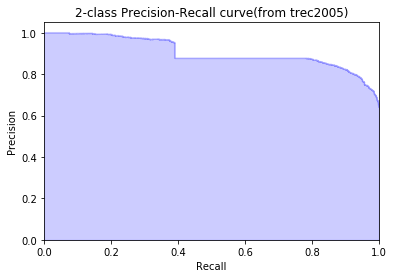

In [14]:
plt.step(svm_object.recall, svm_object.precision, color='b', alpha=0.2, where='post')
plt.fill_between(svm_object.recall, svm_object.precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve(from trec2005)')